# Testing double sphere gain equations

**Scott Prahl**

**May 2024**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import iadpython
%config InlineBackend.figure_format='retina'

def test_sphere():
    R = 30
    d_sphere = 2 * R
    d_sample = 20
    d_third = 15
    d_detector = 10
    uru = 0.5
    s = iadpython.Sphere(d_sphere, d_sample, d_third=d_third, d_detector=d_detector, 
                         r_detector=0.5, r_wall=0.75, r_std=0.8)
    s.sample.uru = uru
    return s


## Basic calculations

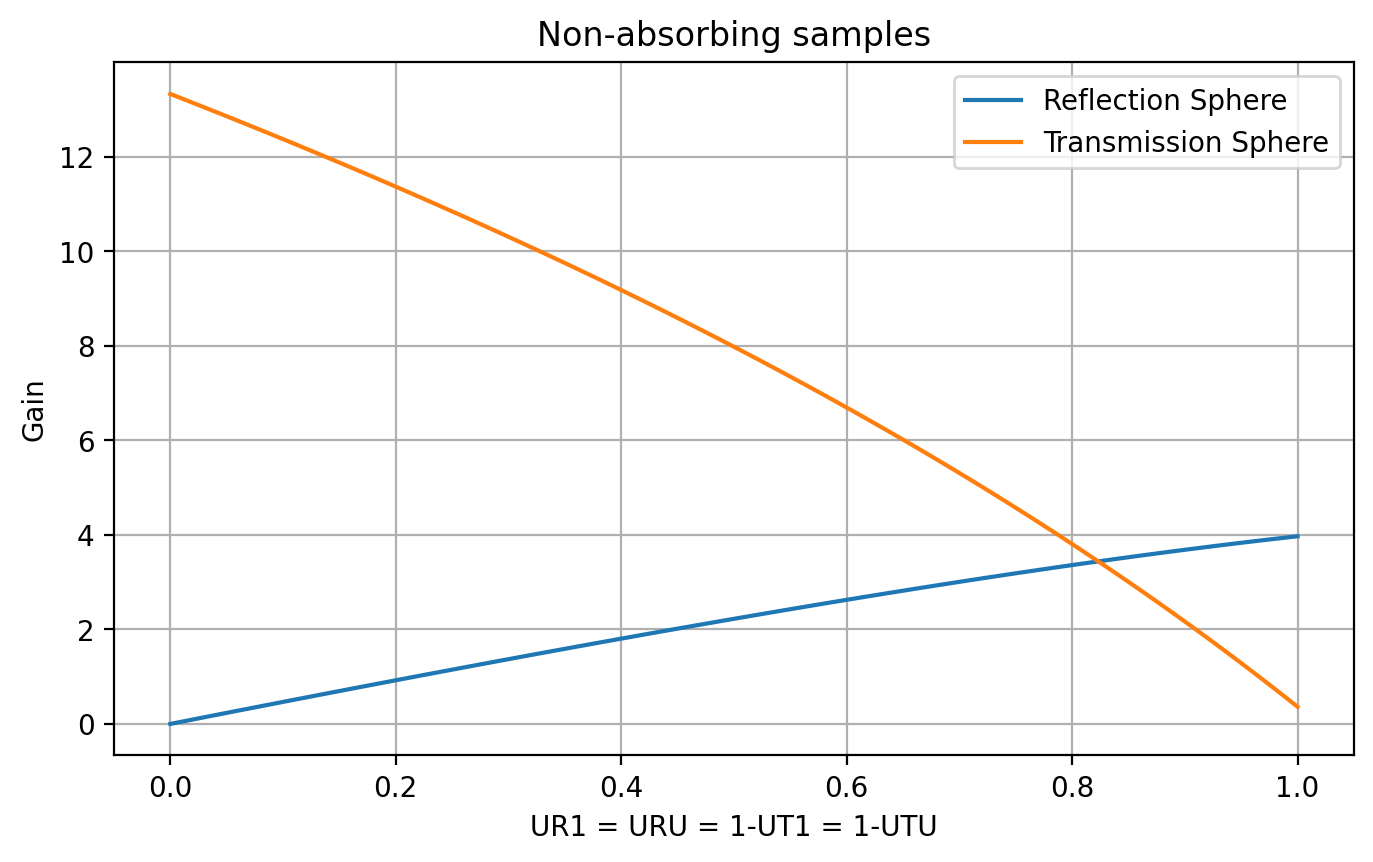

In [2]:
ur1 = np.linspace(0,1,100)
ut1 = 1-ur1
uru = ur1
utu = ur1

d_sphere = 100   # mm
d_sample = 30    # mm
d_entrance = 20  # mm
d_detector = 18  # mm

r_sphere = iadpython.Sphere(d_sphere, d_sample, d_third=d_entrance, d_detector=d_detector, 
                     r_detector=0.5, r_wall=0.75, r_std=0.8)

t_sphere = iadpython.Sphere(d_sphere, d_sample, d_third=0, d_detector=d_detector, 
                     r_detector=0.5, r_wall=0.95, r_std=0.8)

dd = iadpython.DoubleSphere(r_sphere, t_sphere)
dd.uru = uru
dd.ur1 = ur1
dd.utu = utu
dd.ut1 = ut1
gr, gt = dd.gain()

plt.figure(figsize=(8,4.5))
plt.plot(ur1, gr, label='Reflection Sphere')
plt.plot(ur1, gt, label='Transmission Sphere')

plt.xlabel("UR1 = URU = 1-UT1 = 1-UTU")
plt.ylabel("Gain")
plt.title("Non-absorbing samples")
plt.grid(True)
plt.legend()
plt.show()

In [3]:
ur1 = 0.6
ut1 = 0
uru = ur1
utu = ut1

d_sphere = 101.6   # mm
d_sample = 25.4    # mm
d_entrance = 12.7  # mm
d_detector = 12.7  # mm

r_sphere = iadpython.Sphere(d_sphere, d_sample, d_third=d_entrance, d_detector=d_detector, 
                     r_detector=0.0, r_wall=0.95, r_std=0.98)
r_sphere.baffle = False
r_sphere.sample.uru = uru

t_sphere = iadpython.Sphere(d_sphere, d_sample, d_third=0, d_detector=d_detector, 
                     r_detector=0.0, r_wall=0.95, r_std=0.98)
t_sphere.baffle = False
t_sphere.sample.uru = uru

dd = iadpython.DoubleSphere(r_sphere, t_sphere)
dd.uru = uru
dd.ur1 = ur1
dd.utu = utu
dd.ut1 = ut1
gr, gt = dd.gain()
print(gr,gt)

ave_r, stderr_r, ave_t, stderr_t = dd.do_N_photons(100000)

9.540372670807452 0.0
r_average detected   = 0.038 ± 0.001
average gain       = 9.661 ± 0.131
calculated gain    = 9.540

t_average detected   = 0.000 ± 0.000
average gain       = 0.000 ± 0.000
calculated gain    = 0.000


In [21]:
dd.r_sphere.do_N_photons(100000)

average detected   = 0.064 ± 0.000
average gain       = 16.325 ± 0.091
calculated gain    = 15.901
average bounces    = 91.519 ± 0.203


(0.06376895537261805, 0.00035608799915425303)

In [5]:
6.3307/3.8417

1.6478902569175107

In [6]:
def test_sphere():
    R = 30
    d_sphere = 2 * R
    d_sample = 20
    d_third = 15
    d_detector = 10
    s = iadpython.Sphere(d_sphere, d_sample, d_third=d_third, d_detector=d_detector, 
                         r_detector=0.5, r_wall=0.75, r_std=0.8)
    return s

s = test_sphere()
s.sample.uru = 0.5
s.third.uru = 0.95

In [7]:
print('case 1, third = empty, sample = empty, no baffle')
s = test_sphere()
s.sample.uru = 0.0
s.third.uru = 0.00
print(repr(s))
s.do_N_photons(100000)
print()

print('case 2, third = empty, sample = 50%, no baffle')
s = test_sphere()
s.sample.uru = 0.5
s.third.uru = 0.0
print(repr(s))
s.do_N_photons(100000)
print()

print('case 3, third = 95%, sample = 50%, no baffle')
s = test_sphere()
s.sample.uru = 0.5
s.third.uru = 0.95
print(repr(s))
s.do_N_photons(100000)
print()

case 1, third = empty, sample = empty, no baffle
Sphere: d=60.00, r_wall= 75.0%, r_std= 80.0%, baffle= False
    Sample: d= 20.0mm, uru=  0.0%
     Third: d= 15.0mm, uru=  0.0%
  Detector: d= 10.0mm, uru= 50.0%

average detected   = 0.013 ± 0.000
average gain       = 3.704 ± 0.052
calculated gain    = 3.518
average bounces    = 18.049 ± 0.022

case 2, third = empty, sample = 50%, no baffle
Sphere: d=60.00, r_wall= 75.0%, r_std= 80.0%, baffle= False
    Sample: d= 20.0mm, uru= 50.0%
     Third: d= 15.0mm, uru=  0.0%
  Detector: d= 10.0mm, uru= 50.0%

average detected   = 0.013 ± 0.000
average gain       = 3.740 ± 0.040
calculated gain    = 3.698
average bounces    = 25.248 ± 0.021

case 3, third = 95%, sample = 50%, no baffle
Sphere: d=60.00, r_wall= 75.0%, r_std= 80.0%, baffle= False
    Sample: d= 20.0mm, uru= 50.0%
     Third: d= 15.0mm, uru= 95.0%
  Detector: d= 10.0mm, uru= 50.0%

average detected   = 0.014 ± 0.000
average gain       = 4.038 ± 0.040
calculated gain    = 3.913
avera

In [8]:
print('case 1, third = empty, sample = empty, baffle')
s = test_sphere()
s.baffle=True
s.sample.uru = 0.0
s.third.uru = 0.00
print(repr(s))
s.do_N_photons(100000)
print()

print('case 2, third = empty, sample = 50%, baffle')
s = test_sphere()
s.baffle=True
s.sample.uru = 0.5
s.third.uru = 0.0
print(repr(s))
s.do_N_photons(100000)
print()

print('case 3, third = 95%, sample = 50%, baffle')
s = test_sphere()
s.baffle=True
s.sample.uru = 0.5
s.third.uru = 0.95
print(repr(s))
s.do_N_photons(100000)
print()

case 1, third = empty, sample = empty, baffle
Sphere: d=60.00, r_wall= 75.0%, r_std= 80.0%, baffle= True
    Sample: d= 20.0mm, uru=  0.0%
     Third: d= 15.0mm, uru=  0.0%
  Detector: d= 10.0mm, uru= 50.0%

average detected   = 0.009 ± 0.000
average gain       = 3.408 ± 0.076
calculated gain    = 3.506
average bounces    = 18.010 ± 0.030

case 2, third = empty, sample = 50%, baffle
Sphere: d=60.00, r_wall= 75.0%, r_std= 80.0%, baffle= True
    Sample: d= 20.0mm, uru= 50.0%
     Third: d= 15.0mm, uru=  0.0%
  Detector: d= 10.0mm, uru= 50.0%

average detected   = 0.009 ± 0.000
average gain       = 3.701 ± 0.060
calculated gain    = 3.637
average bounces    = 25.200 ± 0.034

case 3, third = 95%, sample = 50%, baffle
Sphere: d=60.00, r_wall= 75.0%, r_std= 80.0%, baffle= True
    Sample: d= 20.0mm, uru= 50.0%
     Third: d= 15.0mm, uru= 95.0%
  Detector: d= 10.0mm, uru= 50.0%

average detected   = 0.010 ± 0.000
average gain       = 3.884 ± 0.053
calculated gain    = 3.849
average bounces  

In [9]:
print('case 3, third = 95%, sample = 50%, baffle')
s = test_sphere()
s.baffle=True
s.sample.uru = 0.95
s.third.uru = 0.25
print(repr(s))
s.do_N_photons(100000)
print()

case 3, third = 95%, sample = 50%, baffle
Sphere: d=60.00, r_wall= 75.0%, r_std= 80.0%, baffle= True
    Sample: d= 20.0mm, uru= 95.0%
     Third: d= 15.0mm, uru= 25.0%
  Detector: d= 10.0mm, uru= 50.0%

average detected   = 0.010 ± 0.000
average gain       = 3.849 ± 0.066
calculated gain    = 3.821
average bounces    = 32.112 ± 0.012



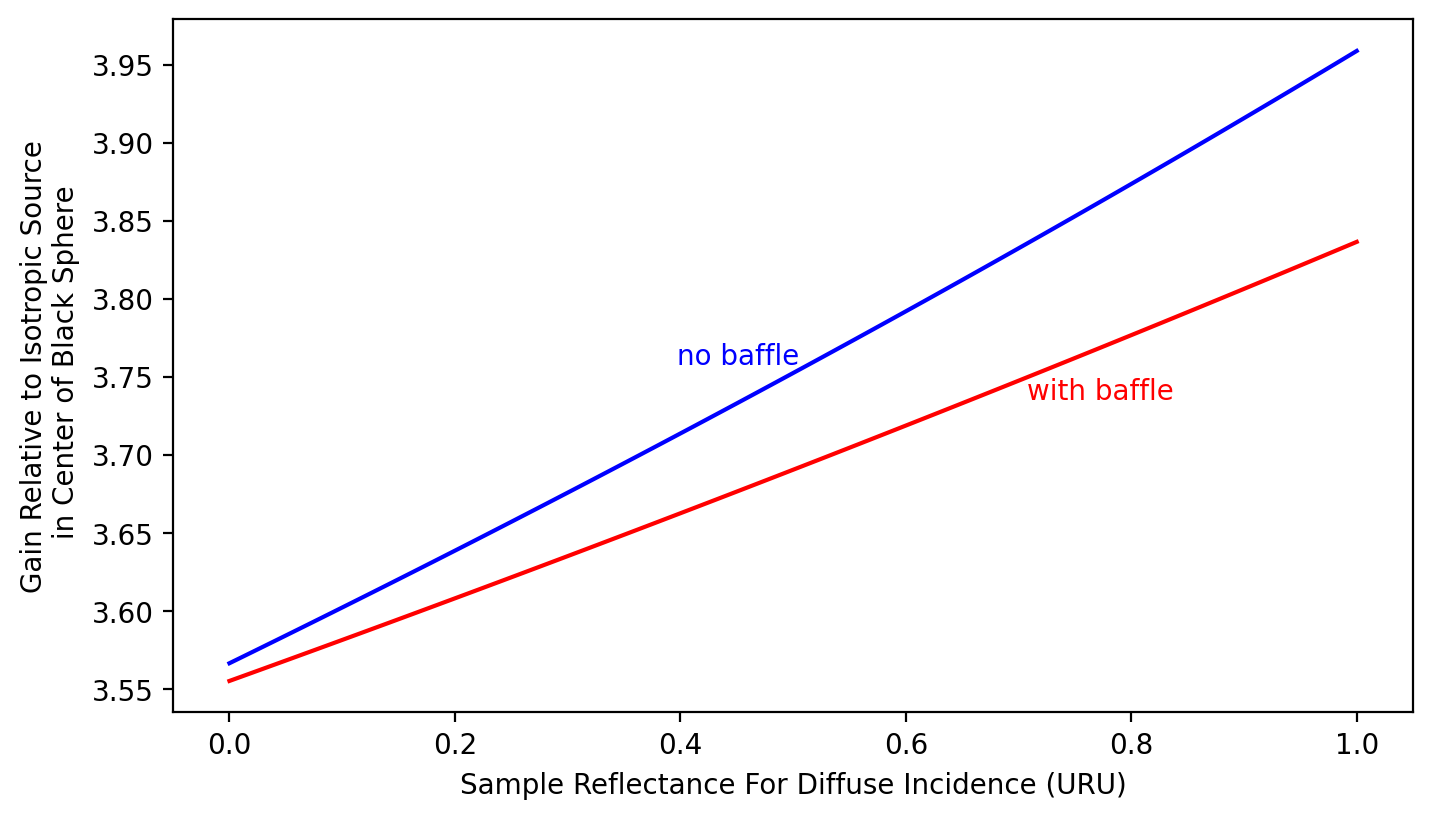

In [10]:
plt.figure(figsize=(8,4.5))
sample_uru = np.linspace(0,1,100)
s.baffle = False
gain = s.gain(sample_uru)
plt.plot(sample_uru, gain, 'b')
plt.text(sample_uru[50], gain[50], 'no baffle', color='blue', ha='right', va='bottom')

s.baffle = True
gain = s.gain(sample_uru)
plt.plot(sample_uru, gain, 'r')
plt.text(sample_uru[70], gain[70], 'with baffle', color = 'red', ha='left', va='top')

plt.xlabel('Sample Reflectance For Diffuse Incidence (URU)')
plt.ylabel('Gain Relative to Isotropic Source\n in Center of Black Sphere')
plt.show()

and we see that the presence or absence of a baffle has a small effect

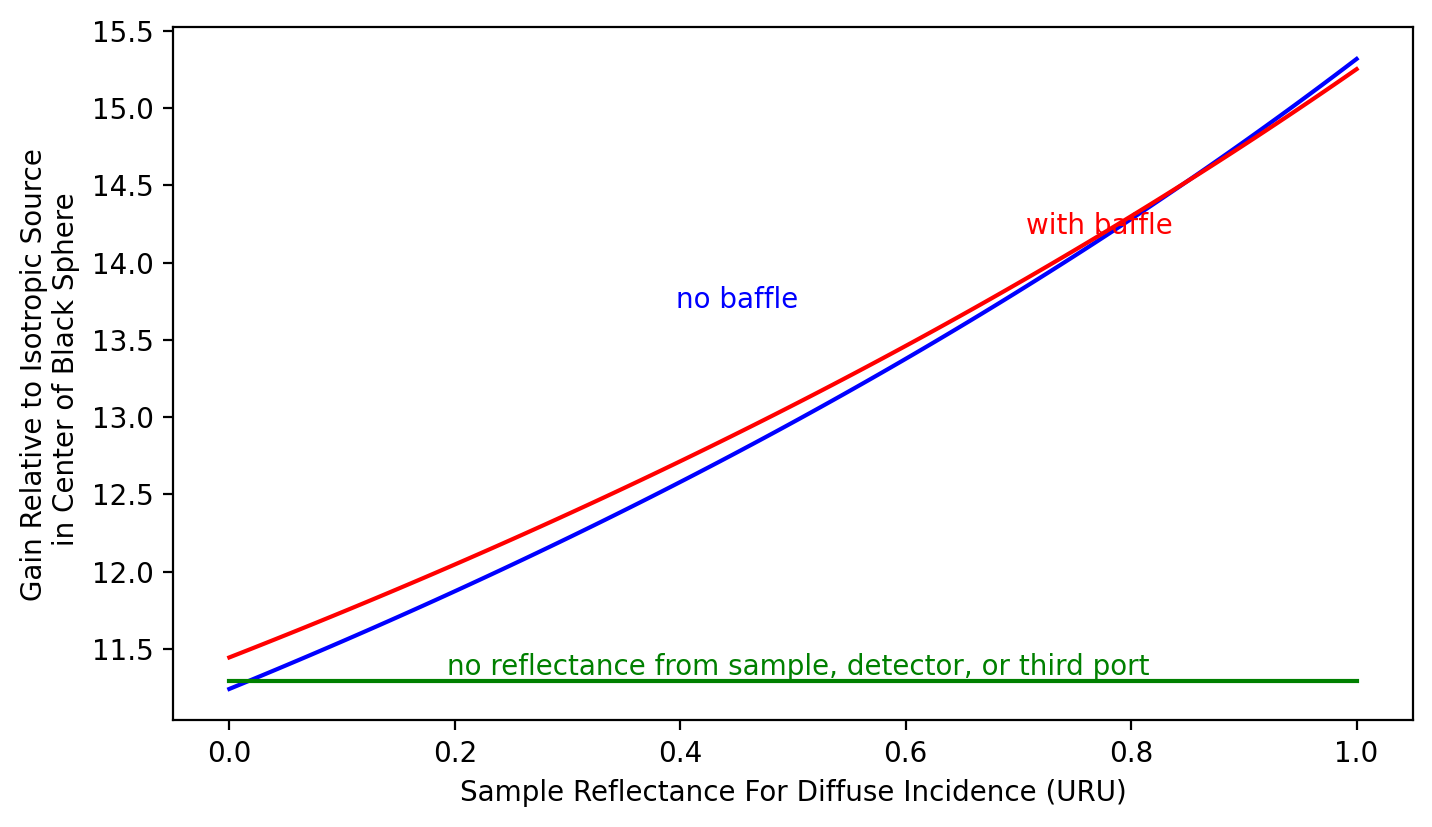

In [13]:
R = 50
r_wall = 0.95
r_std = 0.97
d_sphere = 2 * R
d_sample = 30
d_third = 20
d_detector = 18
s = iadpython.Sphere(d_sphere, d_sample, d_third=d_third, d_detector=d_detector, 
                     r_detector=0.5, r_wall=r_wall, r_std=r_std)

plt.figure(figsize=(8,4.5))
sample_uru = np.linspace(0,1,100)

s.baffle = False
gain = s.gain(sample_uru)
plt.plot(sample_uru, gain*r_wall, 'b')
plt.text(sample_uru[50], gain[50], 'no baffle', color='blue', ha='right', va='bottom')

s.baffle = True
gain = s.gain(sample_uru)
plt.plot(sample_uru, gain*r_std, 'r')
plt.text(sample_uru[70], gain[70], 'with baffle', color = 'red', ha='left', va='top')

gain = np.full_like(sample_uru, 1/(1-s.a_wall*s.r_wall))
plt.plot(sample_uru, gain, 'g')
plt.text(sample_uru[50], gain[50], 'no reflectance from sample, detector, or third port', 
         color='green', ha='center', va='bottom')

plt.xlabel('Sample Reflectance For Diffuse Incidence (URU)')
plt.ylabel('Gain Relative to Isotropic Source\n in Center of Black Sphere')
plt.show()

## Reflection



## Transmission

The idea is to subtract background and normalize by reflectance from a reference standard.

If $P$ is the detected signal on the detector then

$$
M_T = r_\mathrm{standard} \cdot \frac{P_\mathrm{sample} - P_\mathrm{background}}{P_\mathrm{standard} - P_\mathrm{background}}
$$

### Using a port cover for the transmission normalization
<center>
    <img src="sphereMT.png" width="80%" />
</center>

we note that in the standard measurement the baffle is not between the standard (sphere wall) and the reflector.

### Using a reflection standard for the transmission normalization
<center>
    <img src="sphereMT2.png" width="80%" />
</center>

### Using an optical fiber to collect the light

An fiber might be used to collect light for the detector.  The limited numerical aperture of the fiber prevents cross-talk between the sample and the detector.

<center>
    <img src="sphereMT2a.png" width="70%" />
</center>

<center>
    <img src="sphereMT2b.png" width="70%" />
</center>


So for a transmission experiment, the gain when the standard is always present will be `gain(r_sample, r_standard)`.  For the 100% transmission case with nothing in the sample port, the gain will be `gain(0, r_standard)`.  Therefore the value of `M_T` will be
$$
M_T = \frac{P_\text{detector}(\text{sample})}{P_\text{detector}(\text{nothing})} =
\frac{\text{UT1}\cdot P_i \cdot G(\text{URU}, r_\text{standard})}{P_i r_\text{standard} (1-a_\text{sample}) \cdot G(0, r_\text{standard})}
= \text{UT1}\cdot \frac{ G(\text{URU}, r_\text{standard})}{r_\text{standard} (1-a_\text{sample}) G(0, r_\text{standard})}
$$

When the unscattered light is allowed to leave the sphere, then if we assume
$$
\text{UT1} = \text{UT1}' + T_\text{unscattered}
$$
the equations are slightly different
$$
M_T = \frac{\text{UT1}'\cdot P_i \cdot G(\text{URU}, 0)}{P_i \cdot G(0, r_\text{standard})}
= \text{UT1}'\cdot \frac{ G(\text{URU}, 0)}{G(0, r_\text{standard})}
$$

So if we know $P_\text{detector}(\text{sample})$ and $P_\text{detector}(\text{nothing})$ then we can calculate $M_T$ or even UT1.

$$
\text{UT1} = M_T \cdot \frac{r_\text{standard} (1-a_\text{sample}) G(0, r_\text{standard})}{ G(\text{URU}, r_\text{standard})}
$$

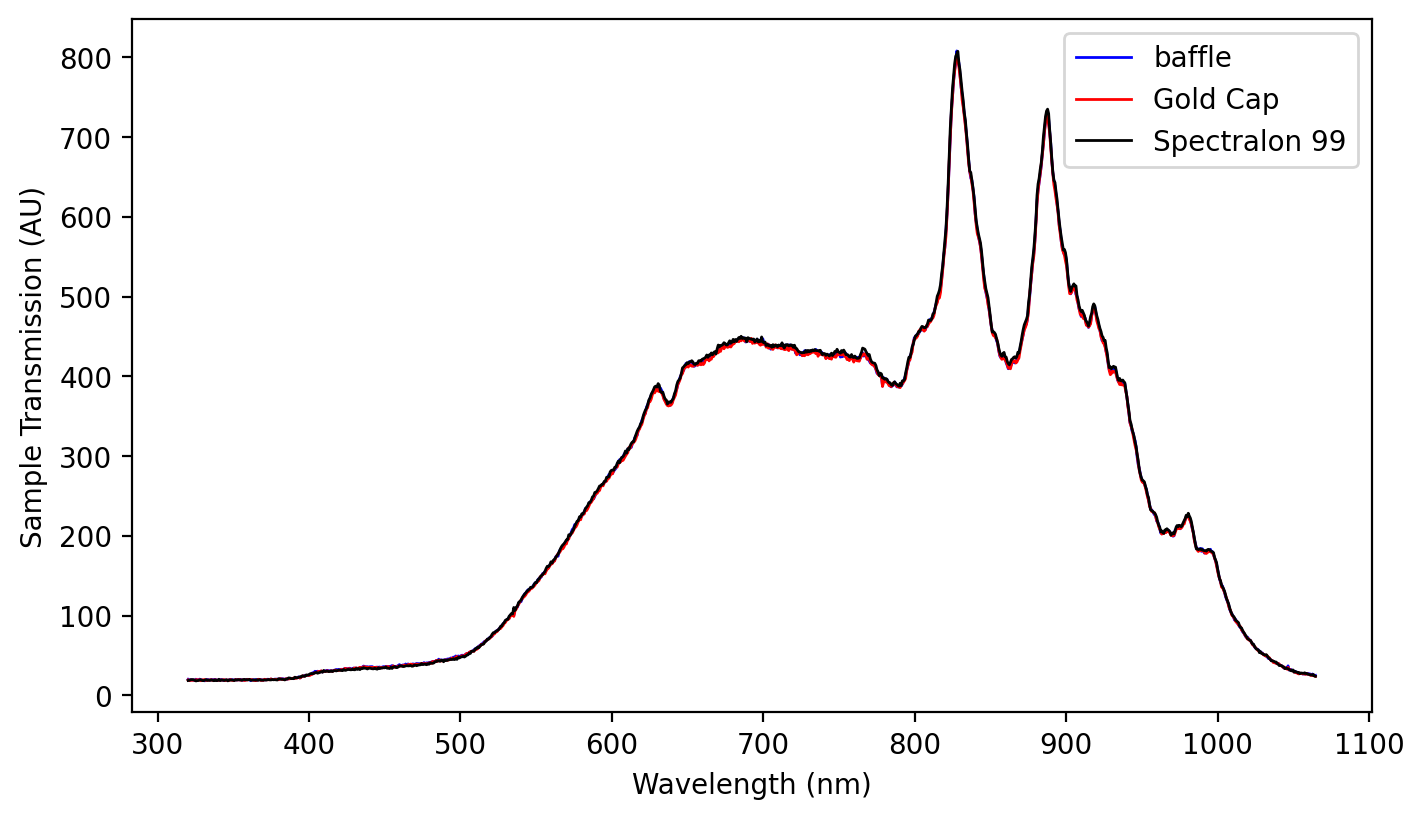

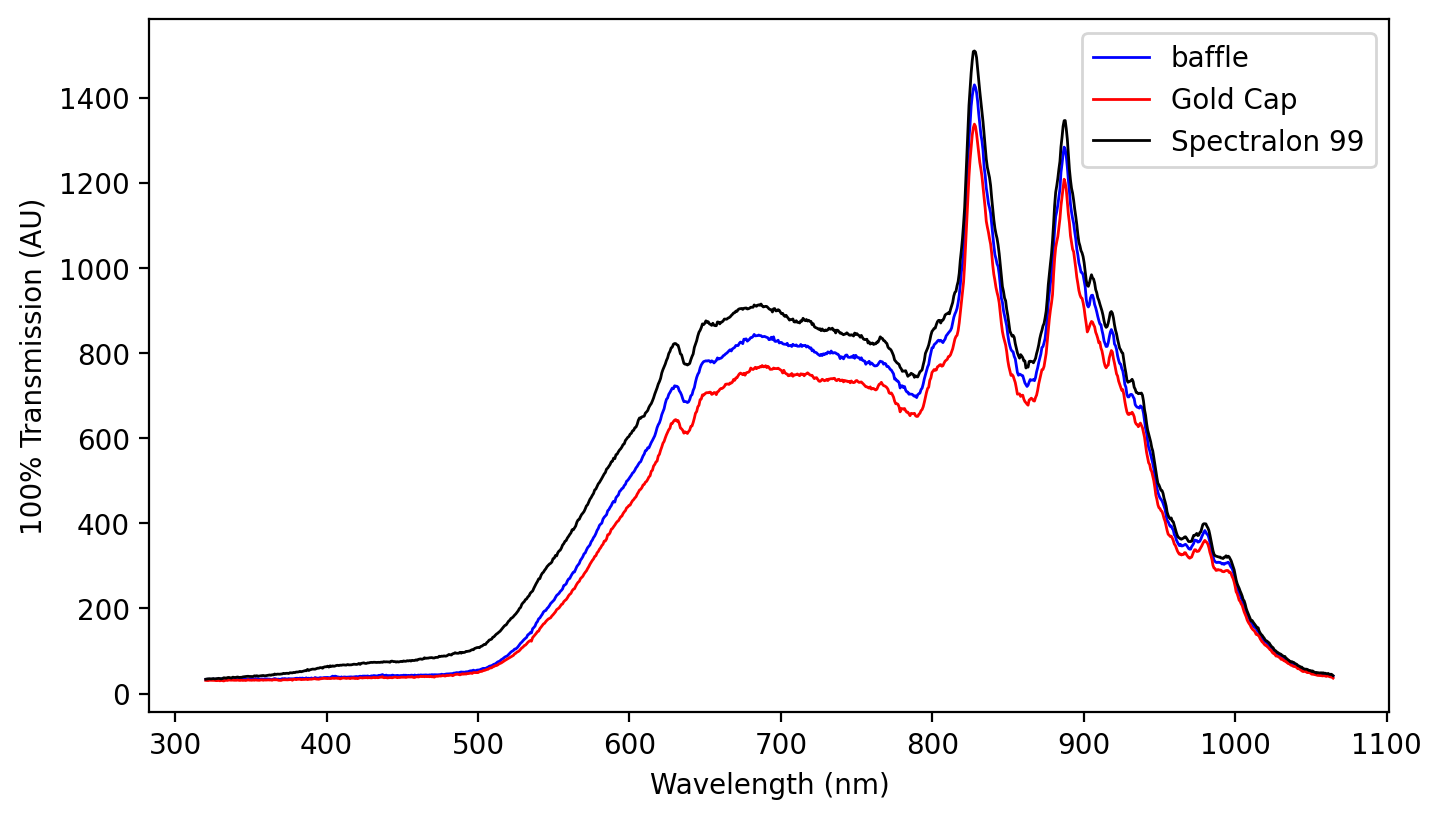

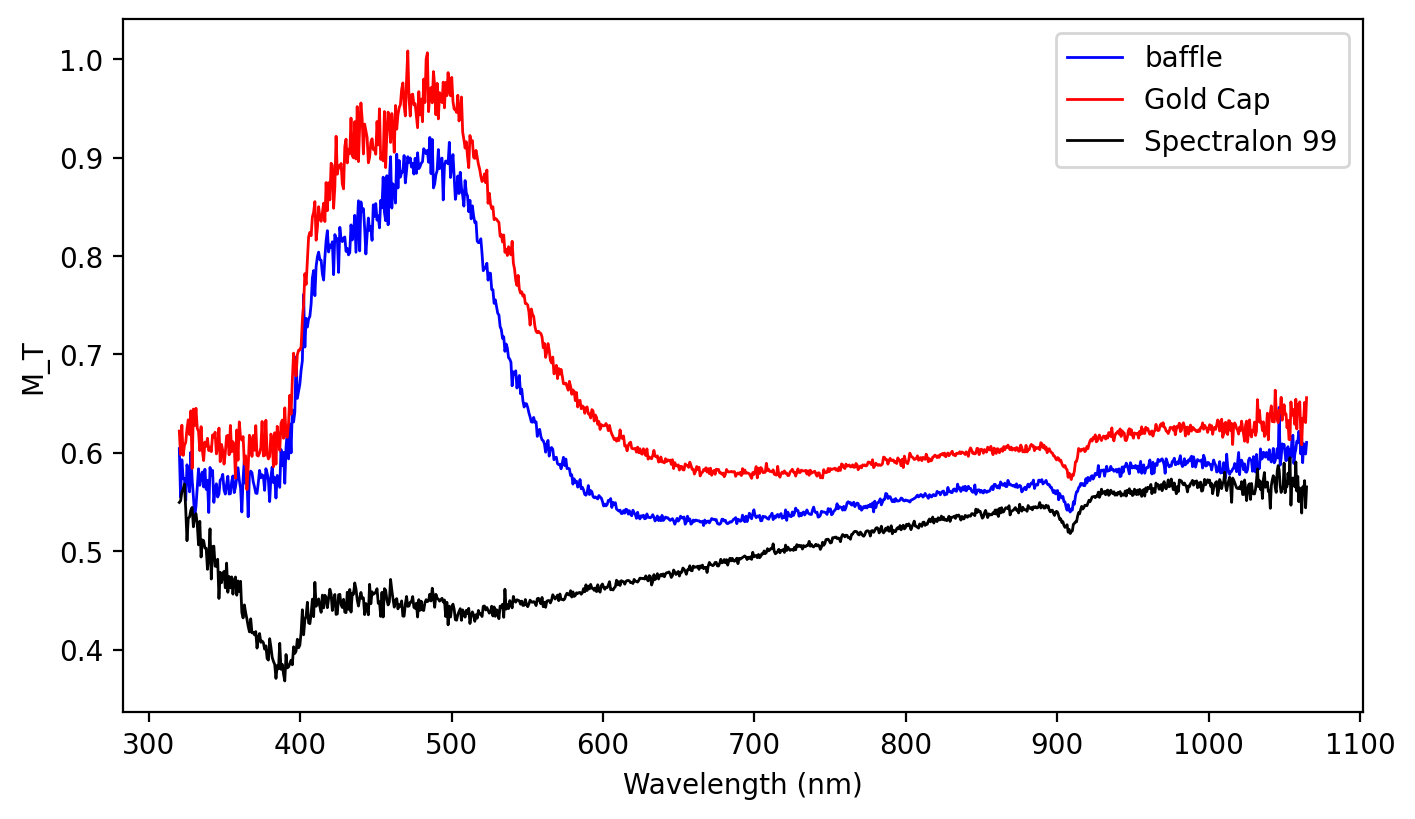

In [14]:
path = '/Users/prahl/Desktop/iad-problems/BLI/2024-3-15-Transmission-Data/'

count, lam, pd_baf_sample = np.loadtxt(path+'Ts_baf.txt', max_rows=1000, delimiter=',').T
count, lam, pd_cap_sample = np.loadtxt(path+'Ts_cap.txt', max_rows=1000, delimiter=',').T
count, lam, pd_sl99_sample = np.loadtxt(path+'Ts_sl99.txt', max_rows=1000, delimiter=',').T

count, lam, pd_baf_none = np.loadtxt(path+'T0_baf.txt', max_rows=1000, delimiter=',').T
count, lam, pd_cap_none = np.loadtxt(path+'T0_cap.txt', max_rows=1000, delimiter=',').T
count, lam, pd_sl99_none = np.loadtxt(path+'T0_sl99.txt', max_rows=1000, delimiter=',').T

lam_base = np.copy(lam)
plt.figure(figsize=(8,4.5))
plt.plot(lam, pd_baf_sample, color='blue', lw=1, label='baffle')
plt.plot(lam, pd_cap_sample, color='red', lw=1, label='Gold Cap')
plt.plot(lam, pd_sl99_sample, color='black', lw=1, label='Spectralon 99')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Sample Transmission (AU)')
plt.legend()
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(lam, pd_baf_none, color='blue', lw = 1, label='baffle')
plt.plot(lam, pd_cap_none, color='red', lw = 1, label='Gold Cap')
plt.plot(lam, pd_sl99_none, color='black', lw = 1, label='Spectralon 99')
plt.xlabel('Wavelength (nm)')
plt.ylabel('100% Transmission (AU)')
plt.legend()
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(lam, pd_baf_sample/pd_baf_none, color='blue', lw = 1, label='baffle')
plt.plot(lam, pd_cap_sample/pd_cap_none, color='red', lw = 1, label='Gold Cap')
plt.plot(lam, pd_sl99_sample/pd_sl99_none, color='black', lw = 1, label='Spectralon 99')
plt.xlabel('Wavelength (nm)')
plt.ylabel('M_T')
plt.legend()
plt.show()

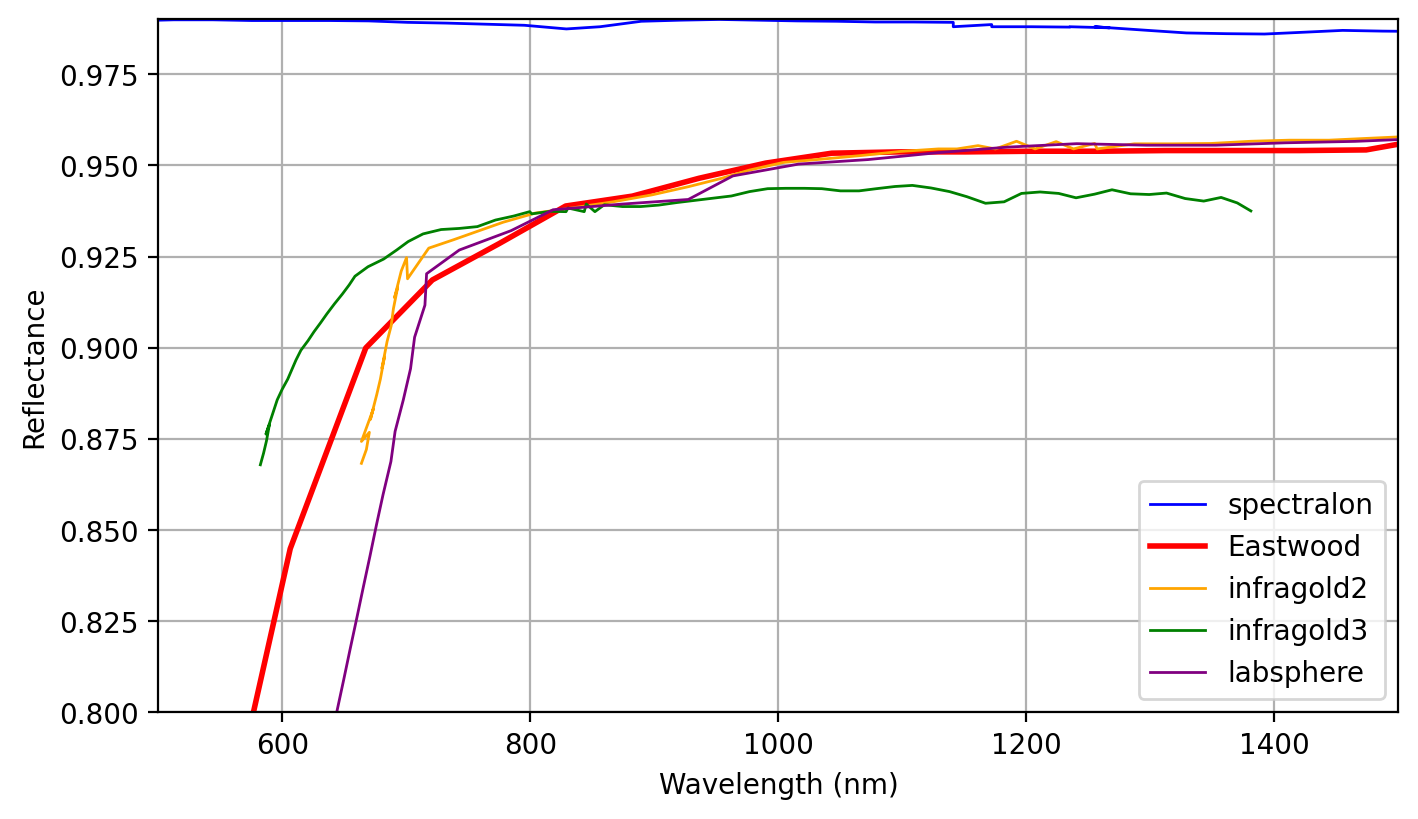

In [15]:
path = '/Users/prahl/Desktop/iad-problems/BLI/2024-3-15-Transmission-Data/'

lam_spectralon, r_spectralon = np.loadtxt(path+'spectralon.csv', skiprows=1, delimiter=',').T
lam_infragold, r_infragold = np.loadtxt(path+'infragold.csv', skiprows=1, delimiter=',').T
lam_infragold2, r_infragold2 = np.loadtxt(path+'infragold2.csv', skiprows=1, delimiter=',').T
lam_infragold3, r_infragold3 = np.loadtxt(path+'infragold3.csv', skiprows=1, delimiter=',').T
lam_infragold4, r_infragold4 = np.loadtxt(path+'infragold4.csv', skiprows=1, delimiter=',').T

plt.figure(figsize=(8,4.5))
plt.plot(lam_spectralon, r_spectralon, color='blue', lw=1, label='spectralon')
plt.plot(lam_infragold, r_infragold*1.81, color='red', lw=2, label='Eastwood')
plt.plot(lam_infragold2, r_infragold2, color='orange', lw=1, label='infragold2')
plt.plot(lam_infragold3, r_infragold3, color='green', lw=1, label='infragold3')
plt.plot(lam_infragold4, r_infragold4, color='purple', lw=1, label='labsphere')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.xlim(500,1500)
plt.ylim(0.8,0.99)
plt.legend()
plt.grid()
plt.show()


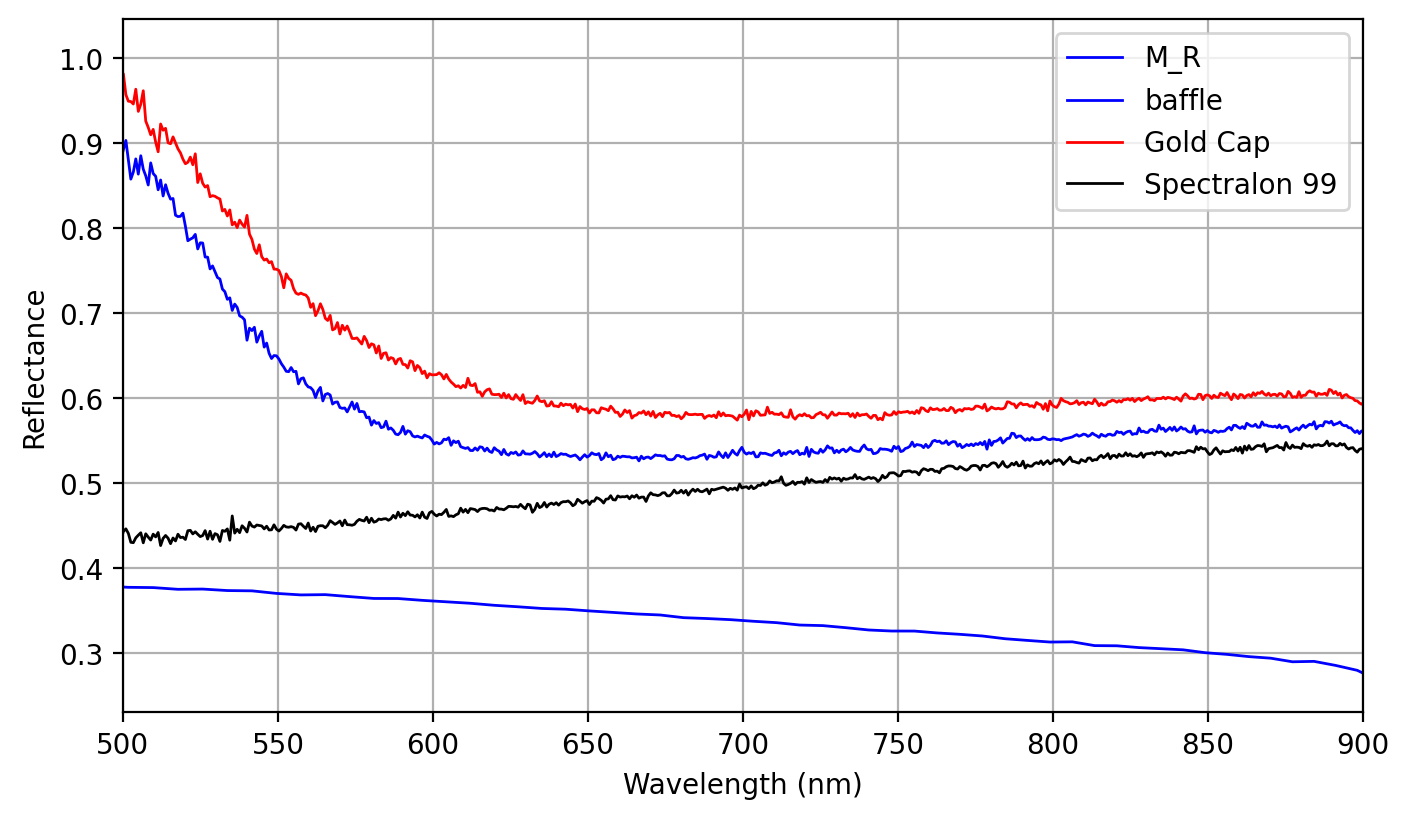

In [16]:
path = '/Users/prahl/Desktop/iad-problems/BLI/2024-3-15-Transmission-Data/'

lam_refl, r_refl = np.loadtxt(path+'refl.csv', skiprows=1, delimiter=',').T

plt.figure(figsize=(8,4.5))
plt.plot(lam_refl, r_refl, color='blue', lw=1, label='M_R')
plt.plot(lam, pd_baf_sample/pd_baf_none, color='blue', lw = 1, label='baffle')
plt.plot(lam, pd_cap_sample/pd_cap_none, color='red', lw = 1, label='Gold Cap')
plt.plot(lam, pd_sl99_sample/pd_sl99_none, color='black', lw = 1, label='Spectralon 99')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.xlim(500,900)
#plt.ylim(0.8,0.99)
plt.legend()
plt.grid()
plt.show()


In [17]:
def r_spectralon_fn(lam):
    return np.interp(lam, lam_spectralon, r_spectralon)

def r_infragold_fn(lam):
    return np.interp(lam, lam_infragold, r_infragold*1.81)

def r_sample_fn(lam):
    return np.interp(lam, lam_refl, r_refl)

def mt_cap_fn(lam):
    return np.interp(lam, lam_base, pd_cap_sample/pd_cap_none)

def mt_baf_fn(lam):
    return np.interp(lam, lam_base, pd_baf_sample/pd_baf_none)

def mt_sl99_fn(lam):
    return np.interp(lam, lam_base, pd_sl99_sample/pd_sl99_none)


So if we know $P_\text{detector}(\text{sample})$ and $P_\text{detector}(\text{nothing})$ then we can calculate $M_T$ or even UT1.

$$
\text{UT1} = M_T \cdot \frac{r_\text{standard} (1-a_\text{sample}) G(0, r_\text{standard})}{ G(\text{URU}, r_\text{standard})}
$$

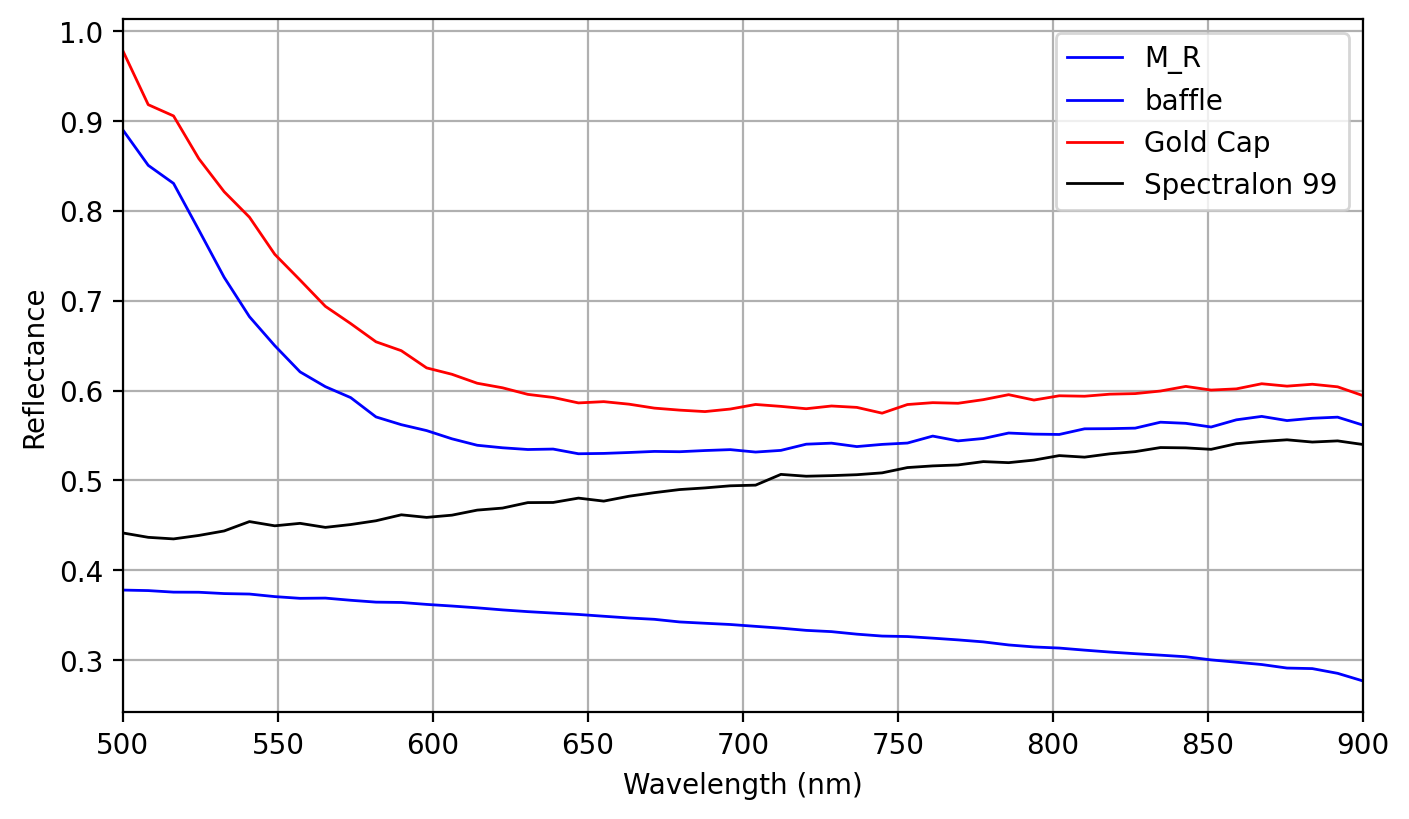

In [18]:
lambda0 = np.linspace(500,900)
plt.figure(figsize=(8,4.5))
plt.plot(lambda0, r_sample_fn(lambda0), color='blue', lw=1, label='M_R')
plt.plot(lambda0, mt_baf_fn(lambda0), color='blue', lw = 1, label='baffle')
plt.plot(lambda0, mt_cap_fn(lambda0), color='red', lw = 1, label='Gold Cap')
plt.plot(lambda0, mt_sl99_fn(lambda0), color='black', lw = 1, label='Spectralon 99')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.xlim(500,900)
#plt.ylim(0.8,0.99)
plt.legend()
plt.grid()
plt.show()

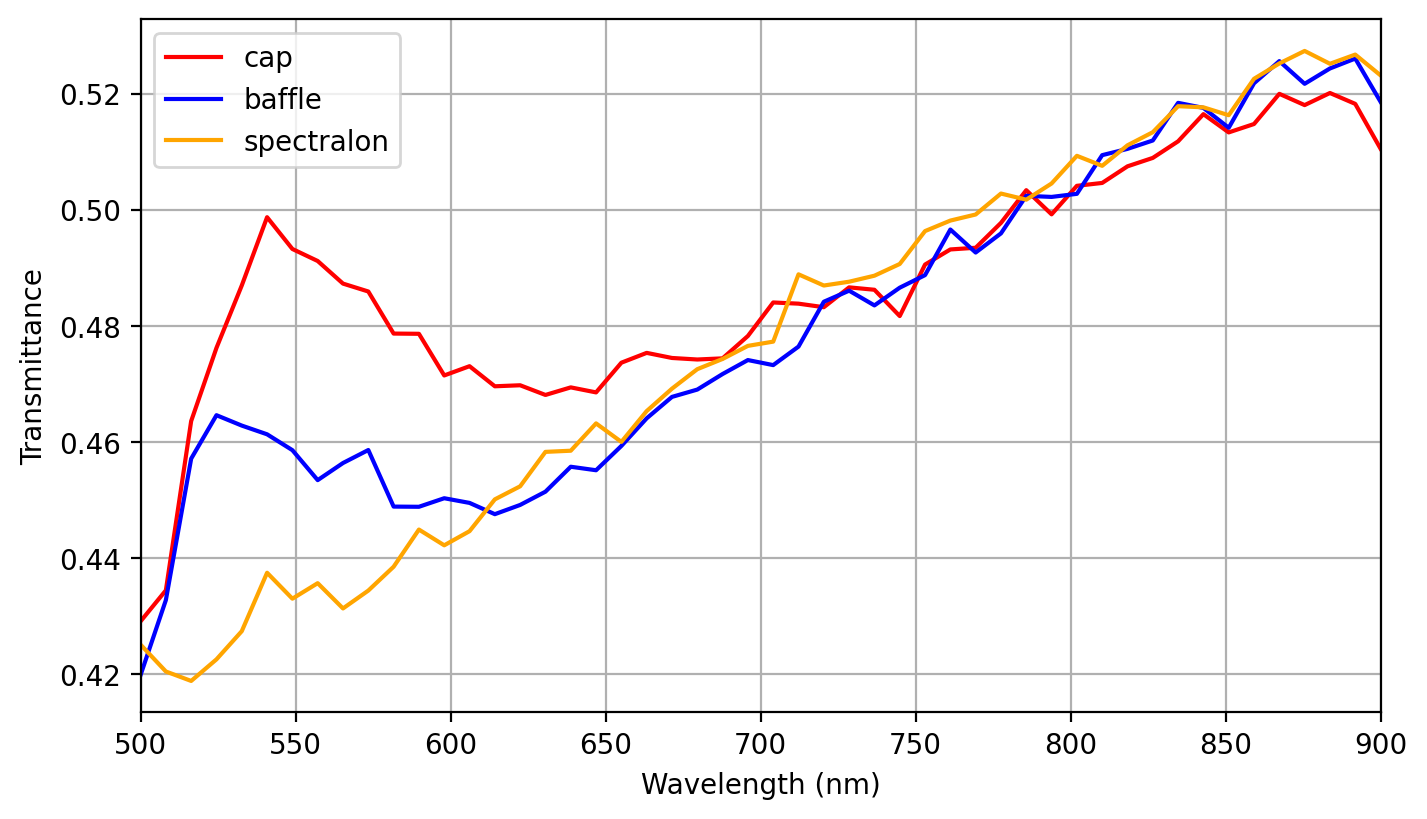

In [19]:
def UT1(s,mt,rstd):
    numer = rstd * (1-s.sample.a)*s.gain(0,rstd)
    denom = s.gain(s.sample.uru, rstd)
    return mt*numer/denom

R = 25.4*2
d_sphere = 2 * R
d_sample = 12.7
d_third = 12.7
d_detector = 2
s = iadpython.Sphere(d_sphere, d_sample, d_third=d_third, d_detector=d_detector, 
                     r_detector=0.1, r_wall=0.94, r_std=0.97)

s.sample.uru = r_sample_fn(lambda0)

ut1_cap = UT1(s,mt_cap_fn(lambda0),r_infragold_fn(lambda0)*0.93)
ut1_baf = UT1(s,mt_baf_fn(lambda0),r_infragold_fn(lambda0))
ut1_sl99 = UT1(s,mt_sl99_fn(lambda0),r_spectralon_fn(lambda0))

plt.plot(lambda0, ut1_cap, color='red', label='cap')
plt.plot(lambda0, ut1_baf, color='blue', label='baffle')
plt.plot(lambda0, ut1_sl99, color='orange', label='spectralon')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmittance')
plt.xlim(500,900)
#plt.ylim(0.8,0.99)
plt.legend()
plt.grid()
plt.show()

In [20]:
# simple numerical test to verify correctness of the wall reflectivity equation
def gain(a_s, r_s, a_d, r_d, a_e, r_w):
    a_w = 1 - a_e - a_d - a_s
    denom = 1 - r_w * a_w - r_w * (1 - a_e) * (a_d * r_d + a_s * r_s)
    return 1 / denom

def calc_rw(a_s, r_s, a_d, r_d, a_e, gamma):
    a_w = 1 - a_e - a_d - a_s
    denom = a_w + (1 - a_e) * (a_d * r_d + a_s * r_s * gamma)
    return 1 / denom

d = 100
d_s = 10
d_e = 20
d_d = 5
A = 4*np.pi * (d/2)**2
a_e = np.pi * (d_e/2)**2 / A
a_d = np.pi * (d_d/2)**2 / A
a_s = np.pi * (d_s/2)**2 / A
r_d = 0.2
r_std = 0.99
r_w = 0.95

p_high = gain(a_s, r_std, a_d, r_d, a_e, r_w)
p_low = gain(a_s, 0, a_d, r_d, a_e, r_w)
gamma = p_high/(p_high-p_low)

RW = calc_rw(a_s, r_std, a_d, r_d, a_e, gamma)
print('calculated wall reflectivity = %8.5f' % RW)
print('  expected wall reflectivity = %8.5f' % r_w)


calculated wall reflectivity =  0.95000
  expected wall reflectivity =  0.95000
